## Load MNIST on Python 3.x

In [2]:
import pickle
import gzip

In [3]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
#print(training_data)
print(training_data[0].shape,training_data[1].shape)#(Total 2)1th:50000*784,2nd:list(50000,)
print(validation_data[0].shape,validation_data[1].shape)#(Total 2)1th:10000*784,2nd:list(10000,)
print(test_data[0].shape,test_data[1].shape)#(Total 2)1th:10000*784,2nd:list(10000,)
f.close()

print(training_data[1])
print(training_data[1][0])

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)
[5 0 4 ... 8 4 8]
5


## Load USPS on Python 3.x

In [4]:
from PIL import Image
import os
import numpy as np

In [5]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            
#print(len(USPSMat))
#print(len(USPSTar))
#print(USPSMat)
print(savedImg)

<PIL.Image.Image image mode=P size=28x28 at 0x2279F5D7080>


# Header File and Libraries

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt


# Multification For Logistic Regression

Preprocess

In [7]:
learningrate=0.005
L_Erms_Val   = []  
L_Erms_TR    = []
L_Erms_Test  = [] 
L_Accu_TR = []
L_Accu_Val=[]
L_Accu_Test=[]

X=training_data[0]
Y=np.matrix(training_data[1])

M=validation_data[0]
N=np.matrix(validation_data[1])

O=test_data[0]
P=np.matrix(test_data[1])

theta_n=np.zeros((10,784))#every pair's features
theta_now=np.matrix(theta_n)

print(X.shape)
print(Y.shape)
print(Y)
print(Y.shape[0])
print(Y[0,5])
print(theta_now.shape[1])
print(theta_now[0,0])

print(X[2].shape)


(50000, 784)
(1, 50000)
[[5 0 4 ... 8 4 8]]
1
2
784
0.0
(784,)


# Onehot for MNIST targets

In [8]:
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def onehot(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    #print(integer_encoded)

    #onehot
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

new=Y.tolist()
onehotvector=new[0]

print("Onehot encoding:")
print(onehot(onehotvector))

print((onehot(onehotvector)).shape)
print((onehot(onehotvector))[0])

Onehot encoding:
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(50000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


S:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
S:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before t

# Main body(MNIST)

In [ ]:
def softmax(x):
    #assert len(z.shape) == 2
    #s = np.max(z, axis=1)
    # necessary step to do broadcasting
    #s = s[:, np.newaxis]#(increase dimensionality(in the column) of the ROW):[5] to [5][1] 
    #e_x = np.exp(z - s)
    #div = np.sum(e_x, axis=1)
    #div = div[:, np.newaxis] # dito
    #return e_x / div
    #softmax_x= [] 
    #exp_x=np.zeros((1,10))
    #exp_x=np.matrix(exp_x)
    #for i in range(10):
        #exp_x[i]= math.exp(x[0][i])
        #softmax_x = np.append(exp_x[i] / sum(exp_x[i]))
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
   
def softmaxindex(z):
   # assert len(z.shape) == 2
    s = np.argmax(z, axis=1)
    return s


def gradient(theta,feature,target):
    c=np.dot(feature,theta.T)#1*784 784*10=1*10
    b=c.tolist()
    d=b[0]
    a=softmax(d)
    a=np.matrix(a)
    error=a-target
    error=np.matrix(error)
    print(error)
    #print(softmax(np.dot(feature,theta.T)))
    grad=np.dot(error.T,feature)#10*1 1*784
    grad=np.matrix(grad)
    return grad

def predict(theta,feature):
    probability=softmaxindex(np.dot(feature,theta.T))
    #print("****Our predictions******")
    #print(probability)
    return probability

def GetLErms(predict,target):
    sum = 0
    counter = 0
    predict=np.matrix(predict)
    target=np.matrix(target)
    len=predict.shape[0]
    for i in range (0,len):
        #sum = sum + math.pow((target[i][0] - predict[i][0]),2)  #square error
        if(predict[i,0]== target[i,0]):
            counter+=1  #correct prediction and increment 
    accuracy = (float((counter))/float(len))###counter*100
    return (str(accuracy))    
    
for i in range(2000):
    delta_theta=gradient(theta_now,np.matrix(X[i]),(onehot(onehotvector))[i])#:1*784
    print(delta_theta)
    updatevalue=np.dot(learningrate,delta_theta)
    #updatevalue=np.array(updatevalue)
    theta_next=theta_now-updatevalue
    theta_now=theta_next#:10*784
    #print(theta_now)
    
    #-----------------TrainingData Erms---------------------#
    TR_TEST_OUT   = predict(theta_now,X)#:50000*1
    Erms_TR       = GetLErms(TR_TEST_OUT,Y.T)
    L_Accu_TR.append(float(Erms_TR))
    
    #-----------------ValidationData Erms---------------------#
    VAL_TEST_OUT  = predict(theta_now,M)#
    Erms_Val      = GetLErms(VAL_TEST_OUT,N.T)
    L_Accu_Val.append(float(Erms_Val))
    
    #-----------------TestingData Erms---------------------#
    TEST_OUT      = predict(theta_now,O)
    Erms_Test = GetLErms(TEST_OUT,P.T)
    L_Accu_Test.append(float(Erms_Test))
    print(Erms_Test)

print ("Training accuracy  = " +str(np.around(max(L_Accu_TR),5)))
print ("Validation accuracy= " +str(np.around(max(L_Accu_Val),5)))  
print ("Testing accuracy   = " +str(np.around(max(L_Accu_Test),5))) 

#pd.Series(float(np.around((Erms_Test),5))).plot()
#plt.show()

In [ ]:
#Expextations of Accuracies
def averageaccuracy(Data):
    sum=0.0
    for i in range(len(Data)):
        sum+=Data[i]
    averageaccuracy=sum/len(Data)
    return averageaccuracy 

TrainingAccuracy   = str(GetLErms(TR_TEST_OUT,Trainingtarget))
ValidationAccuracy = str(GetLErms(VAL_TEST_OUT,ValdataAct))
TestAccuracy       = str(GetLErms(TEST_OUT,TestdataAct))
print('TRaverageaccuracy=',averageaccuracy(L_Accu_TR))
print('Valaverageaccuracy=',averageaccuracy(L_Accu_Val))
print('Testaverageaccuracy=',averageaccuracy(L_Accu_Test))

# Neural network(MNIST)

start now:
loss= 0.25248564515709876
accuracy= 0.9323
(10000,)
(10000,)
confusion matrix of Neural Network:


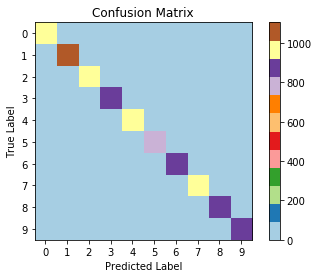

In [22]:
import keras
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot
from matplotlib import pyplot as plt

print("start now:")
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)
num_classes=10
y_train=keras.utils.to_categorical(y_train,num_classes)
ytt_test=keras.utils.to_categorical(y_test,num_classes)

image_size=784 
model=Sequential()
model.add(Dense(units=64,activation='sigmoid',input_shape=(image_size,)))
model.add(Dense(units=num_classes,activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=False,validation_split=.1)
loss,accuracy=model.evaluate(x_test,ytt_test,verbose=False)#


print("loss=",loss)
print("accuracy=",accuracy)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
y_true=y_test
y_pred=model.predict_classes(x_test)

print(y_true.shape)
print(y_pred.shape)
#混淆矩阵
print("confusion matrix of Neural Network:")
confusion_mat=confusion_matrix(y_true,y_pred)

def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar()
    marks=np.arange(10)
    plt.xticks(marks,marks)
    plt.yticks(marks,marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
plot_confusion_matrix(confusion_mat)
plt.show()

# Neural network(USPS testing)

start now:
loss= 2.036344950351365
accuracy= 0.2811640582029101
confusion matrix of Neural Network:


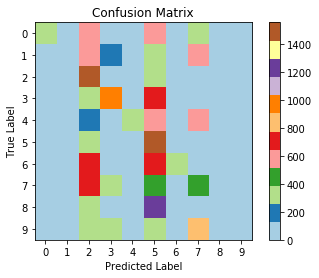

In [24]:
import keras
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot
from matplotlib import pyplot as plt

print("start now:")
u_test=np.array(USPSMat)
ut_test=np.array(USPSTar)
u_test=u_test.reshape(u_test.shape[0],784)
utt_test=keras.utils.to_categorical(ut_test,num_classes)

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)
num_classes=10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

image_size=784 
model=Sequential()
model.add(Dense(units=64,activation='sigmoid',input_shape=(image_size,)))
model.add(Dense(units=num_classes,activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=False,validation_split=.1)
loss,accuracy=model.evaluate(u_test,utt_test,verbose=False)#

print("loss=",loss)
print("accuracy=",accuracy)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
y_true=ut_test
y_pred=model.predict_classes(u_test)

#混淆矩阵
print("confusion matrix of Neural Network:")
confusion_mat=confusion_matrix(y_true,y_pred)

def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(10)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(confusion_mat)
plt.show()

# Neural network(Another different MNIST datasets for training and testing)

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

#Preprocessing
train_labels=mnist.train.labels
test_labels=mnist.test.labels
train_images=mnist.train.images.reshape(55000,784)
test_images=mnist.test.images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255

#Construct neural network
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))  #discard 20% datas
model.add(Dense(10,activation='softmax'))
model.summary()

#Set loss function and youhua method
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#Train model
history=model.fit(train_images,train_labels,batch_size=100,epochs=20,verbose=2,validation_data=(test_images,test_labels))

score=model.evaluate(test_images,test_labels,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5

# SVM (sklearn)(rbf,gamma=0.05)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata

mnist=fetch_mldata('MNIST original')
n_train=60000
n_test=10000
indices=np.arange(len(mnist.data))
train_idx=np.arange(0,n_train)
test_idx=np.arange(n_train+1,n_train+n_test)

X_train=mnist.data[train_idx]
y_train=mnist.target[train_idx]
X_test=mnist.data[test_idx]
y_test=mnist.target[test_idx]

classifier1=SVC(kernel='rbf',C=2,gamma=0.05);
classifier1.fit(X_train,y_train)

print("SVM prediction =",classifier1.predict(x_test))
print("SVM accuracy=",classifier1.score(x_test,y_test))


S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
SVMprediction=classifier1.predict(x_test)

SVM sample:
import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
>>> y = np.array([1, 1, 2, 2])
>>> from sklearn.svm import SVC
>>> clf = SVC(gamma='auto')
>>> clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
>>> print(clf.predict([[-0.8, -1]]))
[1]

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

# SVM (rbf,gamma=1)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata

mnist=fetch_mldata('MNIST original')
n_train=60000
n_test=10000
indices=np.arange(len(mnist.data))
train_idx=np.arange(0,n_train)
test_idx=np.arange(n_train+1,n_train+n_test)

x_train=mnist.data[train_idx]
y_train=mnist.target[train_idx]
x_test=mnist.data[test_idx]
y_test=mnist.target[test_idx]
#SVM
classifier1=SVC(kernel='rbf',C=2,gamma=1);
classifier1.fit(x_train,y_train)

print("SVM prediction =",classifier1.predict(x_test))
print("SVM accuracy=",classifier1.score(x_test,y_test))

# SVM (linear,gamma=1)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata

mnist=fetch_mldata('MNIST original')
n_train=60000
n_test=10000
indices=np.arange(len(mnist.data))
train_idx=np.arange(0,n_train)
test_idx=np.arange(n_train+1,n_train+n_test)

x_train=mnist.data[train_idx]
y_train=mnist.target[train_idx]
x_test=mnist.data[test_idx]
y_test=mnist.target[test_idx]
#SVM
classifier1=SVC(kernel='linear',C=2,gamma=1);
classifier1.fit(x_train,y_train)

print("SVM prediction =",classifier1.predict(x_test))
print("SVM accuracy=",classifier1.score(x_test,y_test))

S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


# Random Forest(sklearn)with MNIST

S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Random Forest prediction= [0. 0. 0. ... 9. 9. 9.]
Random Forest accuracy= 0.9605960596059606
confusion matrix of Random Forest:


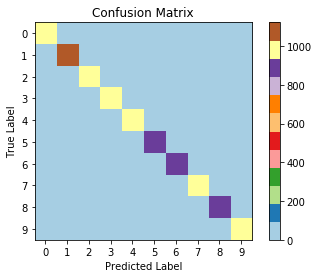

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
n_train=60000
n_test=10000
indices=np.arange(len(mnist.data))
train_idx=np.arange(0,n_train)
test_idx=np.arange(n_train+1,n_train+n_test)

x_train=mnist.data[train_idx]
y_train=mnist.target[train_idx]
x_test=mnist.data[test_idx]
y_test=mnist.target[test_idx]
#RandomForest
classifier2=RandomForestClassifier(n_estimators=20); #max_depth,min_samples
classifier2.fit(x_train,y_train)

print("Random Forest prediction=",classifier2.predict(x_test))
print("Random Forest accuracy=",classifier2.score(x_test,y_test))

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
y_true=y_test
y_pred=classifier2.predict(x_test)

#混淆矩阵
print("confusion matrix of Random Forest:")
confusion_mat=confusion_matrix(y_true,y_pred)

def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(10)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
plot_confusion_matrix(confusion_mat)
plt.show()

# Random Forest(sklearn)with USPS testing

S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
S:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Random Forest prediction= [5. 1. 7. ... 1. 7. 1.]
Random Forest accuracy= 0.1415070753537677
confusion matrix of Random Forest:


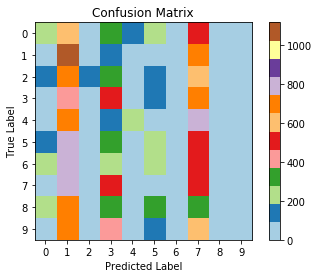

In [15]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
import keras
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot
from matplotlib import pyplot as plt
mnist=fetch_mldata('MNIST original')
n_train=60000
n_test=10000
indices=np.arange(len(mnist.data))
train_idx=np.arange(0,n_train)
test_idx=np.arange(n_train+1,n_train+n_test)

u_test=np.array(USPSMat)
ut_test=np.array(USPSTar)
#u_test=u_test.reshape(u_test.shape[0],784)
#ut_test=keras.utils.to_categorical(ut_test,10)

x_train=mnist.data[train_idx]
y_train=mnist.target[train_idx]
x_test=mnist.data[test_idx]
y_test=mnist.target[test_idx]
#RandomForest
classifier2=RandomForestClassifier(n_estimators=10); #max_depth,min_samples
classifier2.fit(x_train,y_train)

print("Random Forest prediction=",classifier2.predict(u_test))
print("Random Forest accuracy=",classifier2.score(u_test,ut_test))

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
y_true=ut_test
y_pred=classifier2.predict(u_test)

#混淆矩阵
print("confusion matrix of Random Forest:")
confusion_mat=confusion_matrix(y_true,y_pred)

def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(10)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
plot_confusion_matrix(confusion_mat)
plt.show()

# Combining above four models

# MNIST

In [27]:
import pickle
import gzip

filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
#print(training_data)
print(training_data[0].shape,training_data[1].shape)#(Total 2)1th:50000*784,2nd:list(50000,)
print(validation_data[0].shape,validation_data[1].shape)#(Total 2)1th:10000*784,2nd:list(10000,)
print(test_data[0].shape,test_data[1].shape)#(Total 2)1th:10000*784,2nd:list(10000,)
f.close()

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')

n_train=1000
n_test=1000
indices=np.arange(len(mnist.data))
train_idx=np.arange(0,n_train)
test_idx=np.arange(n_train+1,n_train+n_test)

X_train=mnist.data[train_idx]
y_train=mnist.target[train_idx]
X_test=mnist.data[test_idx]
y_test=mnist.target[test_idx]

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# n_samples=500：表示生成 500 个样本；默认自动生成 100 个样本；
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
accuracy1=log_clf.score(X_test, y_test)
print("Accuracy of Logistic regression =",accuracy1)

#SVM
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
accuracy2=svm_clf.score(X_test, y_test)
print("Accuracy of SVM =",accuracy2)

#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
accuracy3=dt_clf.score(X_test, y_test)
print("Accuracy of DecisionTree =",accuracy3)

#Neural network
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(X_train, y_train)
accuracy4=nn_clf.score(X_test, y_test)
print("Accuracy of DecisionTree =",accuracy4)

y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)
y_predict4 = nn_clf.predict(X_test)
print("Logistic regression prediction is:",y_predict1)
print("SVM prediction is:",y_predict2)
print("DesionForest prediction is:",y_predict3)
print("Neural network prediction is:",y_predict4)
print(len(y_predict1))

y_predict = np.array((y_predict1 + y_predict2 + y_predict3+y_predict4) >= 3, dtype='int')
print(y_predict)

from sklearn.metrics import accuracy_score
accuracy4=accuracy_score(y_test, y_predict)
print("Accuracy of Integrated learning=",accuracy4)
print("Combing model prediction is:",y)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_predict)
print("Accuracy of Integrated learning=",accuracy)

Accuracy of Logistic regression = 0.864
Accuracy of SVM = 0.888
Accuracy of DecisionTree = 0.84
Accuracy of DecisionTree = 0.912
Logistic regression prediction is: [1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
SVM prediction is: [0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0]
DesionForest prediction is: [1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 1]
Neural network predictio

S:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
S:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Neural network SKlearn(another cancer example)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()

# Print full description by running:
# print(cancer['DESCR'])
# 569 data points with 30 features
cancer['data'].shape

X = cancer['data']
y = cancer['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training the model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

#Prediction and evaluation
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))